In [8]:
from numpy.random import seed
from numpy.random import shuffle
import numpy as np
import random

def lab():
    k=25
    sq1 = np.arange(25,34)
    sq1 = np.resize(sq1,(3,3))
    for i in sq1:
        for j in range(3):
            i[j] = k
        k+=1
    return sq1


def process_s(sequence):
    news= ""
    for i in sequence:
        if i != '[' and i != ']' and i != ',':
            news +=str(i)+" "
    news = news.split()
    news =  list(map(int,news))

def ch(sequence):
    k=0
    dummy = np.zeros(17, dtype=np.int64)
    sequence = np.concatenate((sequence,dummy)).tolist()
    la = lab().tolist()
    sq = []
    while len(sq) < 3:
        # print(sequence)
        k = random.randint(0,32)
        if k%7 <2 and k//6 not in sq:
            sq.append(k//6)
            for i in range(3):
                sequence.insert(k,la[len(sq)-1][0])
    return str(sequence)

def process_string(sequence):
    news= ""
    for i in sequence:
        if i != '0' and i != '[' and i != ']' and i != ',':
            news +=i
    return news.split()


# seed(1)
def gentable():
    #42
    sequence = np.arange(1,26)
    shuffle(sequence)
    shuffle(sequence)
    shuffle(sequence)
    shuffle(sequence)
    for i in range(25):
        sequence[i] = sequence[i]//5 + 1
    s = ch(sequence)
    sequence = process_string(s)
    for i in range(8):
        sequence.append('0')
    table = np.resize(sequence,(6,7))
    return table
    # lp = np.arange(42,48)
    # shuffle(lp)
    # lp = np.reshape(lp,(6,1))
    # table = np.hstack((table,lp ))
    # return table



def add_freep(table):
    x = np.array(['free'])
    for i in range(5):
        x = np.append(x, ['free'])
    x = np.resize(x,[6,1])
    table = np.hstack((table,x))
    return table


def ran(r):
    return random.randint(0,r)

In [9]:
import gtable
import matplotlib.pylab as pl

names = ["Python","WT","DBMS","Flat","CO", "OS"]
Labs = ["Lab1", "Lab2","Lab3"]
subphrs = 5 #25
labhrs = 9
extrahrs = 8
examhrs = 6


def conv(table):
    global names, Labs
    for i in table:
        for j in range(len(i)):
            if i[j] == 'free' or i[j] == 'Test' or i[j] == 'Revision':
                continue
            if int(i[j]) < 7:
                if int(i[j]) == 0:
                    i[j] = 'Unallocated'
                else:
                    i[j] = names[int(i[j])-1]
            else:
                i[j] = Labs[int(i[j]) - 25 ]
    names = names[1:]
    names.append(names[0])
    Labs = Labs[1:]
    Labs.append(Labs[0])
    return table


def plot(table,x):
    ny = len(table)
    nx = len(table[0])
    pl.figure("Section "+ str(x+1))
    tb = pl.table(cellText=table, loc=(0,0), cellLoc='center')
    tc = tb.properties()['child_artists']
    for cell in tc: 
        cell.set_height(1/ny)
        cell.set_width(1/nx)
    ax = pl.gca()
    ax.set_xticks([])
    ax.set_yticks([])

    pl.show()


table = gtable.gentable()
table[[5,2]] = table[[2,5]]
table = gtable.add_freep(table).tolist()

for i in range(4,8):
    table[1][i] , table[2][i] = 'Revision' , table[1][i]
table[2][3] = 'free'

table[2][0] = 'Test'
table[2][1] = 'Test'

table[4][6] = 'free'


x = 2
while x==2 or x==1 or table[x][6]=='free':
    x = gtable.ran(4)
table[x][6] , table[2][2] = 'free' , table[x][6]


x = 2
while x==2 or x == 1 or table[x][6]=='free':
    x = gtable.ran(4)

table[x][6] , table[2][3] = 'free' , table[x][6]

import copy

sec = []
for i in range(4):
    sec.append(copy.deepcopy(list(table[:])))
for i in range(4):
    conv(sec[i])


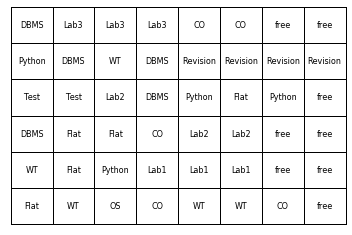

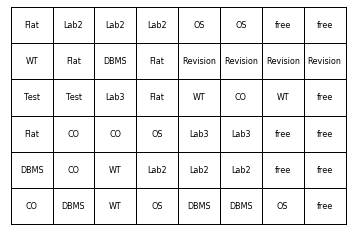

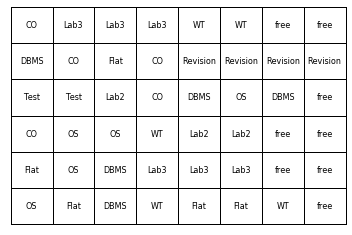

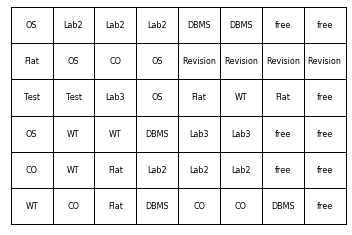

In [11]:
for i in range(4):
    plot(sec[i],i)